## **Final Project Submission**

Please fill out:
* Student name: Alex Kipkurui korir
* Student pace: part time
* Scheduled project review date/time: 13th May 2024 to 22nd May 2024
* Instructor name: William Okomba/Noah Kandie
* Blog post URL:

## **Business Understanding**

### Introduction:
Tanzania, a country with a population exceeding 57 million, faces significant challenges in providing clean water to its residents. While numerous water wells have been established, many of these wells are either in disrepair or have failed entirely. Ensuring the functionality of these water wells is crucial for public health, agriculture, and overall quality of life. Predictive analytics can play a pivotal role in identifying which wells are likely to fail, need repair, or are functioning well, thus enabling proactive maintenance and efficient resource allocation

### Stakeholders and Usage:

#### Government of Tanzania:
1. Objective: Improve water supply infrastructure and resource planning.
2. Usage: By analyzing patterns in well failures, the government can develop more effective strategies for constructing new wells, maintaining existing ones, and optimizing resource allocation. This can lead to better-informed decisions on where to invest in infrastructure improvements and preventative maintenance.

#### Non-Governmental Organizations (NGOs):
1. Objective: Enhance the efficiency and impact of water-related aid programs.
2. Usage: NGOs can use predictive models to prioritize wells that need urgent repairs or are at risk of failing. This enables them to deploy their resources more effectively, ensuring that their interventions have the maximum positive impact on communities reliant on these water sources.

#### Local Communities:

1. Objective: Gain reliable access to clean water.
2. Usage: By participating in data collection and reporting well conditions, local communities can contribute to the ongoing monitoring and maintenance efforts. This collaboration can help ensure that issues are addressed promptly, minimizing the time residents are without clean water.

### Conclusion:
Developing a classifier to predict the condition of water wells in Tanzania holds significant potential for improving water supply reliability across the country. By leveraging data analytics, stakeholders such as the government, NGOs, and local communities can make informed decisions about where to focus their efforts and resources. This proactive approach can lead to more sustainable water infrastructure, ensuring that clean water is accessible to all Tanzanians. Furthermore, the insights gained from this predictive modeling can guide future well construction and maintenance practices, ultimately enhancing the resilience and effectiveness of Tanzania’s water supply systems.

## **Data Understanding**

Our data sources are :

**Training Set Values**:
1. Description: Contains independent variables about each water well (e.g., type of pump, installation year, location).
2. Usage: Used to train the predictive model.

**Training Set Labels**:

1. Description: Contains the dependent variable (status_group) for each well, indicating its condition (functional, non-functional, needs repair).
2. Usage: Provides target outcomes for training the model

**Test Set Values**:

1. Description: Contains independent variables for wells needing predictions, similar to the training set values but without labels.
2. Usage: The model predicts the condition of these wells.

**Submission Format**:

1. Description: Template for submitting predictions, including well IDs and predicted status_group.
2. Usage: Ensures predictions are submitted in the correct format for evaluation.

In [211]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.cluster import KMeans
import scipy.stats as stats
import prince
import contextily as ctx
from matplotlib.lines import Line2D
# Load the data
train_values = pd.read_csv("C:/Users/Akipkurui/Desktop/Moringa- Data Science/Phase 3/Project/data/training set values.csv")
train_labels = pd.read_csv("C:/Users/Akipkurui/Desktop/Moringa- Data Science/Phase 3/Project/data/training set labels.csv")
test_values = pd.read_csv("C:/Users/Akipkurui/Desktop/Moringa- Data Science/Phase 3/Project/data/test set values.csv")


In [212]:
# Display the first few rows of the datasets
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [213]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [214]:
test_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,04/02/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,04/02/2013,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,01/02/2013,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,22/01/2013,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,27/03/2013,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [215]:
#Checking the structure of our datasets
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [216]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [217]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [218]:
# Getting a summary of statitiscal measures about the data set
train_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [219]:
train_labels.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


In [220]:
test_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


## **Data Preparation**

### Merging Datasets

In [221]:
# Merging train set values and train set labels
train_data= (pd.merge(train_values,train_labels,on="id",how="inner"))
train_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,03/05/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,07/05/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,11/04/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,08/03/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


### Duplicates removal

In [222]:
# Checking for duplicates
duplicates = train_data[train_data.duplicated()]
duplicates

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


There are no duplicate rows in this data set

### Dealing with null values

In [223]:
# Checking for columns with null values
print(train_data.isna().mean()*100)

id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.122896
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.003367
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.528620
scheme_name              48.501684
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

### Checking for similar columns

#### Scheme_Management, Management group and Management

In [224]:
# Grouping the management columns to check similarity
train_data['management'].value_counts()

management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64

In [225]:
train_data['management_group'].value_counts()

management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64

In [226]:
train_data['scheme_management'].value_counts()

scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64

In [227]:
train_data.groupby(['management_group','management']).count() 

id  amount_tsh  date_recorded  funder  \
management_group management                                                   
commercial       company             685         685            685     663   
                 private operator   1971        1971           1971    1957   
                 trust                78          78             78      78   
                 water authority     904         904            904     836   
other            other               844         844            844     837   
                 other - school       99          99             99      99   
parastatal       parastatal         1768        1768           1768    1624   
unknown          unknown             561         561            561     533   
user-group       vwc               40507       40507          40507   37630   
                 water board        2933        2933           2933    2715   
                 wua                2535        2535           2535    2308   
                 wug                6515        6515           6515    6483   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        663        685       685   
                 private operator        1971       1959       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        836        904       904   
other            other                    844        831        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1626       1768      1768   
unknown          unknown                  561        527        561       561   
user-group       vwc                    40507      37630      40507     40507   
                 water board             2933       2714       2933      2933   
                 wua                     2535       2309       2535      2535   
                 wug                     6515       6473       6515      6515   

                                   wpt_name  num_private  ...  water_quality  \
management_group management                               ...                  
commercial       company                685          685  ...            685   
                 private operator      1971         1971  ...           1971   
                 trust                   78           78  ...             78   
                 water authority        904          904  ...            904   
other            other                  844          844  ...            844   
                 other - school          99           99  ...             99   
parastatal       parastatal            1768         1768  ...           1768   
unknown          unknown                561          561  ...            561   
user-group       vwc                  40507        40507  ...          40507   
                 water board           2932         2933  ...           2933   
                 wua                   2535         2535  ...           2535   
                 wug                   6514         6515  ...           6515   

                                   quality_group  quantity  quantity_group  \
management_group management                                                  
commercial       company                     685       685             685   
                 private operator           1971      1971            1971   
                 trust                        78        78              78   
                 water authority             904       904             904   
other            other                       844       844             844   
                 other - school               99        99              99   
parastatal       parastatal                 1768   

**From above data scheme_management and management columns have the same values however scheme_management has null values hence we wll drop scheme_management. management column is a subset of management-group hence similarity. Since Management column is more detailed, we will drop management_group and retain management column**

#### extraction_type, extraction_type_group and extraction_type_class

In [228]:
train_data['extraction_type'].value_counts()

extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64

In [229]:
train_data['extraction_type_group'].value_counts()

extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: count, dtype: int64

In [230]:
train_data['extraction_type_class'].value_counts()


extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64

In [231]:
train_data.groupby(['extraction_type_class','extraction_type_group']).count() 

id  amount_tsh  date_recorded  \
extraction_type_class extraction_type_group                                     
gravity               gravity                26780       26780          26780   
handpump              afridev                 1770        1770           1770   
                      india mark ii           2400        2400           2400   
                      india mark iii            98          98             98   
                      nira/tanira             8154        8154           8154   
                      other handpump           364         364            364   
                      swn 80                  3670        3670           3670   
motorpump             mono                    2865        2865           2865   
                      other motorpump          122         122            122   
other                 other                   6430        6430           6430   
rope pump             rope pump                451         451            451   
submersible           submersible             6179        6179           6179   
wind-powered          wind-powered             117         117            117   

                                             funder  gps_height  installer  \
extraction_type_class extraction_type_group                                  
gravity               gravity                 24704       26780      24714   
handpump              afridev                  1668        1770       1665   
                      india mark ii            2358        2400       2358   
                      india mark iii             98          98         98   
                      nira/tanira              7899        8154       7885   
                      other handpump            353         364        354   
                      swn 80                   3595        3670       3593   
motorpump             mono                     2577        2865       2578   
                      other motorpump           122         122        122   
other                 other                    6010        6430       6002   
rope pump             rope pump                 448         451        448   
submersible           submersible              5819        6179       5816   
wind-powered          wind-powered              112         117        112   

                                             longitude  latitude  wpt_name  \
extraction_type_class extraction_type_group                                  
gravity               gravity                    26780     26780     26779   
handpump              afridev                     1770      1770      1770   
                      india mark ii               2400      2400      2400   
                      india mark iii                98        98        98   
                      nira/tanira                 8154      8154      8154   
                      other handpump               364       364       364   
                      swn 80                      3670      3670      3670   
motorpump             mono                        2865      2865      2865   
                      other motorpump              122       122       122   
other                 other                       6430      6430      6429   
rope pump             rope pump                    451       451       451   
submersible           submersible                 6179      6179      6179   
wind-powered          wind-powered                 117       117       117   

                                             num_private  ...  water_quality  \
extraction_type_class extraction_type_group               ...                  
gravity               gravity                      26780  ...          26780   
handpump              afridev                       1770  ...           1770   
                      india mark ii                 2400  ...           2400   
                      india mark iii                  98  ...             98   
          

**It is evident that this 3 columns contain the same data. extraction_type and extraction_type_group contain the same data however extraction_type_group appears to be more compact. extraction_type_group appears to be a subset of extrcation_type_class. We will drop extraction_type and extraction_type_class and retain extraction_type_group since it is more compact and has more details.**

#### payment and payment_type

In [232]:
train_data['payment'].value_counts()

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64

In [233]:
train_data['payment_type'].value_counts()

payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: count, dtype: int64

**This 2 columns are similar we decided to drop 1 i.e payment**

#### quantity and quantity-group

In [234]:
train_data['quantity'].value_counts()

quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

In [235]:
train_data['quantity_group'].value_counts()

quantity_group
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

**This 2 columns are similar we decided to drop 1 i.e quantity_group**

#### water_quality and quality_group

In [236]:
train_data['water_quality'].value_counts()

water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

In [237]:
train_data['quality_group'].value_counts()

quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: count, dtype: int64

**The 2 columns are similar however water_quality column has more details hence we will drop quality_group**

#### source, source_type and source_class

In [238]:
train_data['source'].value_counts()

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

In [239]:
train_data['source_type'].value_counts()

source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64

In [240]:
train_data['source_class'].value_counts()

source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64

In [241]:
train_data.groupby(['source_class','source_type']).count() 

id  amount_tsh  date_recorded  funder  \
source_class source_type                                                      
groundwater  borehole              11949       11949          11949   11119   
             shallow well          16824       16824          16824   16301   
             spring                17021       17021          17021   15870   
surface      dam                     656         656            656     647   
             rainwater harvesting   2295        2295           2295    2099   
             river/lake            10377       10377          10377    9478   
unknown      other                   278         278            278     249   

                                   gps_height  installer  longitude  latitude  \
source_class source_type                                                        
groundwater  borehole                   11949      11114      11949     11949   
             shallow well               16824      16286      16824     16824   
             spring                     17021      15870      17021     17021   
surface      dam                          656        646        656       656   
             rainwater harvesting        2295       2096       2295      2295   
             river/lake                 10377       9483      10377     10377   
unknown      other                        278        250        278       278   

                                   wpt_name  num_private  ...  payment  \
source_class source_type                                  ...            
groundwater  borehole                 11948        11949  ...    11949   
             shallow well             16824        16824  ...    16824   
             spring                   17020        17021  ...    17021   
surface      dam                        656          656  ...      656   
             rainwater harvesting      2295         2295  ...     2295   
             river/lake               10377        10377  ...    10377   
unknown      other                      278          278  ...      278   

                                   payment_type  water_quality  quality_group  \
source_class source_type                                                        
groundwater  borehole                     11949          11949          11949   
             shallow well                 16824          16824          16824   
             spring                       17021          17021          17021   
surface      dam                            656            656            656   
             rainwater harvesting          2295           2295           2295   
             river/lake                   10377          10377          10377   
unknown      other                          278            278            278   

                                   quantity  quantity_group  source  \
source_class source_type                                              
groundwater  borehole                 11949           11949   11949   
             shallow well             16824           16824   16824   
             spring                   17021           17021   17021   
surface      dam                        656             656     656   
             rainwater harvesting      2295            2295    2295   
             river/lake               10377           10377   10377   
unknown      other                      278             278     278   

                                   waterpoint_type  waterpoint_type_group  \
source_class source_type                                                    
groundwater  borehole                        11949                  11949   
             shallow well                    16824                  16824   
             spring                          17021                  17021   
surface      dam                               656                    656   
             rainwater harvesting             2295                   2295   
             river/l

**The 3 columns are similar. source is more detailed that source_type while source_type is a subset of source_class hence we will remain with source and drop source_type and source_class**

#### waterpoint_type and waterpoint_type_group

In [242]:
train_data['waterpoint_type'].value_counts()

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64

In [243]:
train_data['waterpoint_type_group'].value_counts()

waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: count, dtype: int64

**The 2 columns are similar howoever waterpoint_type has more details hence we will drop waterpoint_type_group**

### Drop identical columns

In [244]:
train_data1=train_data.drop(columns=['management_group','scheme_management','extraction_type_class','extraction_type','quantity_group','source_class','source_type','quality_group',
                'payment_type', 'waterpoint_type_group'])
train_data1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,03/05/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,functional
59396,27263,4700.0,07/05/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,functional
59397,37057,0.0,11/04/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,False,0,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,functional
59398,31282,0.0,08/03/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,True,0,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional


#### Exporing contruction_year column

In [245]:
train_data1['construction_year'].value_counts()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

In [246]:
train_data1['construction_year'].value_counts().sum()


59400

**We have replace contruction_year that is balnk with unknown**

In [247]:
# Replace 'Unknown' with NaN
train_data1['construction_year'] = train_data1['construction_year'].replace('Unknown', np.nan)

# Convert construction_year to numeric, handling NaN values
train_data1['construction_year'] = pd.to_numeric(train_data1['construction_year'], errors='coerce')

# Define the function to get the decade in the desired format
def get_decade(year):
    if pd.isna(year):
        return 'Unknown'
    else:
        decade_start = (year // 10) * 10
        return f"{str(int(decade_start))[-2:]}s"

# Apply the function to create the 'decade' column
train_data1['decade'] = train_data1['construction_year'].apply(get_decade)

# Verify the changes
train_data1['decade'].value_counts()

decade
0s     20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: count, dtype: int64

**We have now grouped construction year into decades for easy visualization and interpretation**

#### recorded_by

In [248]:
train_data1['recorded_by'].value_counts()

recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64

In [249]:
train_data1.drop(columns=['recorded_by'],inplace=True  ) 

**Has only one record hence we will drop this column**

### Correcting errors and spelling mistakes in installer and funder columns

#### installer

In [250]:
train_data1['installer'].value_counts()

installer
DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: count, Length: 2145, dtype: int64

In [251]:
# filling 0 values with unknown
train_data1['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) 

In [252]:
# filling null values with unknown
train_data1['installer'].fillna(value='Unknown',inplace=True)  

In [253]:
# From the most common 100 value counts we realized some spelling mistakes or different syntax between same categories

# Replacing the spelling mistakes and collect same categories in same name

train_data1['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

train_data1['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
train_data1['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

train_data1['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

train_data1['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

train_data1['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

train_data1['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

train_data1['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
train_data1['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

train_data1['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)
train_data1['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

train_data1['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

train_data1['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [254]:
# continue to replacing spellin mistakes and getting together values
train_data1['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
train_data1['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
train_data1['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
train_data1['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
train_data1['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
train_data1['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
train_data1['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
train_data1['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
train_data1['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
train_data1['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [255]:
train_data1['installer'].value_counts().head(20)

installer
DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
villagers               408
LGA                     408
WEDECO                  397
TASAF                   396
Unicef                  332
Name: count, dtype: int64

In [256]:
# Create a new column 'installer_classified' with default value 'Others'
train_data1['installer_classified'] = 'Others'

# Get the counts of each installer
installer_counts = train_data1['installer'].value_counts()

# Update the 'installer_classified' column for installers with less than 500 records
for installer, count in installer_counts.items():
    if count > 500:
        train_data1.loc[train_data1['installer'] == installer, 'installer_classified'] = installer

# Print the first few rows to check the results
train_data1['installer_classified'].value_counts().head(20)

installer_classified
Others                23260
DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
Name: count, dtype: int64

#### funder

In [257]:
# filling 0 and null values with unknown
train_data1['funder'].fillna(value='Unknown',inplace=True)
train_data1['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
train_data1['funder'].value_counts().head(20)


funder
Government Of Tanzania    9084
Unknown                   4418
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: count, dtype: int64

In [258]:
# Create a new column 'funder_classified' with default value 'Others'
train_data1['funder_classified'] = 'Others'

# Get the counts of each installer
funder_counts = train_data1['funder'].value_counts()

# Update the 'installer_classified' column for installers with less than 500 records
for funder, count in funder_counts.items():
    if count > 483:
        train_data1.loc[train_data1['funder'] == funder, 'funder_classified'] = funder

# Print the first few rows to check the results
train_data1['funder_classified'].value_counts().head(20)

funder_classified
Others                    26449
Government Of Tanzania     9084
Unknown                    4418
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Dwsp                        811
Norad                       765
Germany Republi             610
Tcrs                        602
Ministry Of Water           590
Water                       583
Name: count, dtype: int64

### Other columns

We will drop the following columns since they do not have any relationship with functionality of the wells:

1. id
2. wpt_name
3. date_recorded
4. scheme_name
5. region_code

In [259]:
train_data1.drop(columns=['wpt_name','scheme_name','id','region_code',"date_recorded"],inplace=True )

In [260]:
train_data1

,amount_tsh,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,...,management,payment,water_quality,quantity,source,waterpoint_type,status_group,decade,installer_classified,funder_classified
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,Iringa,...,vwc,pay annually,soft,enough,spring,communal standpipe,functional,90s,Others,Others
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Nyamara,Mara,...,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,10s,Others,Others
2,25.0,Lottery Club,686,world vision,37.460664,-3.821329,0,Pangani,Majengo,Manyara,...,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,00s,world vision,Others
3,0.0,Unicef,263,Unicef,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,80s,Others,Unicef
4,0.0,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,Kagera,...,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,0s,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,Germany Republi,1210,CES,37.169807,-3.253847,0,Pangani,Kiduruni,Kilimanjaro,...,water board,pay per bucket,soft,enough,spring,communal standpipe,functional,90s,CES,Germany Republi
59396,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,0,Rufiji,Igumbilo,Iringa,...,vwc,pay annually,soft,enough,river,communal standpipe,functional,90s,Others,Others
59397,0.0,Unknown,0,Unknown,34.017087,-8.750434,0,Rufiji,Madungulu,Mbeya,...,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,functional,0s,Unknown,Unknown
59398,0.0,Malec,0,Musa,35.861315,-6.378573,0,Rufiji,Mwinyi,Dodoma,...,vwc,never pay,soft,insufficient,shallow well,hand pump,functional,0s,Others,Others


#### amount_tsh

In [261]:
train_data1['amount_tsh'].value_counts()

amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: count, Length: 98, dtype: int64

In [262]:
train_data1.drop(columns=['amount_tsh'],inplace=True )

Most of the records are zero hence we drop the column

In [263]:
train_data1.drop(columns=['num_private'],inplace=True )

In [264]:
train_data1

,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,district_code,lga,...,management,payment,water_quality,quantity,source,waterpoint_type,status_group,decade,installer_classified,funder_classified
0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,...,vwc,pay annually,soft,enough,spring,communal standpipe,functional,90s,Others,Others
1,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,2,Serengeti,...,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,10s,Others,Others
2,Lottery Club,686,world vision,37.460664,-3.821329,Pangani,Majengo,Manyara,4,Simanjiro,...,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,00s,world vision,Others
3,Unicef,263,Unicef,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,...,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,80s,Others,Unicef
4,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,...,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,0s,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,5,Hai,...,water board,pay per bucket,soft,enough,spring,communal standpipe,functional,90s,CES,Germany Republi
59396,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,4,Njombe,...,vwc,pay annually,soft,enough,river,communal standpipe,functional,90s,Others,Others
59397,Unknown,0,Unknown,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,7,Mbarali,...,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,functional,0s,Unknown,Unknown
59398,Malec,0,Musa,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,4,Chamwino,...,vwc,never pay,soft,insufficient,shallow well,hand pump,functional,0s,Others,Others


### Checking remaining null values

In [265]:
print(train_data1.isna().mean()*100)

funder                   0.000000
gps_height               0.000000
installer                0.000000
longitude                0.000000
latitude                 0.000000
basin                    0.000000
subvillage               0.624579
region                   0.000000
district_code            0.000000
lga                      0.000000
ward                     0.000000
population               0.000000
public_meeting           5.612795
permit                   5.144781
construction_year        0.000000
extraction_type_group    0.000000
management               0.000000
payment                  0.000000
water_quality            0.000000
quantity                 0.000000
source                   0.000000
waterpoint_type          0.000000
status_group             0.000000
decade                   0.000000
installer_classified     0.000000
funder_classified        0.000000
dtype: float64


### Remaining columns with null values: subvillage, public_meeting, permit

### permit

In [266]:
train_data1['permit'].value_counts()

permit
True     38852
False    17492
Name: count, dtype: int64

In [267]:
train_data1['permit'].fillna(value=True, inplace=True)

**We have replace null values with True since it is the highest**

#### public_meeting

In [268]:
train_data1['public_meeting'].value_counts()

public_meeting
True     51011
False     5055
Name: count, dtype: int64

In [269]:
train_data1['public_meeting'].fillna(value=True, inplace=True)

**We have replace null values with True since it is the highest**

#### subvillage

**Drop subvillage since we already have region**

In [270]:
train_data1.drop(columns=['subvillage'],inplace=True )

In [271]:
print(train_data1.isna().mean()*100)

funder                   0.0
gps_height               0.0
installer                0.0
longitude                0.0
latitude                 0.0
basin                    0.0
region                   0.0
district_code            0.0
lga                      0.0
ward                     0.0
population               0.0
public_meeting           0.0
permit                   0.0
construction_year        0.0
extraction_type_group    0.0
management               0.0
payment                  0.0
water_quality            0.0
quantity                 0.0
source                   0.0
waterpoint_type          0.0
status_group             0.0
decade                   0.0
installer_classified     0.0
funder_classified        0.0
dtype: float64


#### population

In [272]:
#Getting the mean and median
train_data1.loc[train_data1['population']!=0].describe()

,gps_height,longitude,latitude,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,969.889634,36.074387,-6.139781,6.299456,281.087167,1961.399721
std,612.544787,2.586779,2.737733,11.303334,564.687660,263.994165
min,-90.000000,29.607122,-11.649440,1.000000,1.000000,0.000000
25%,347.000000,34.715340,-8.388839,2.000000,40.000000,1986.000000
50%,1135.000000,36.706815,-5.750877,3.000000,150.000000,2000.000000
75%,1465.000000,37.940149,-3.597016,5.000000,324.000000,2008.000000
max,2770.000000,40.345193,-1.042375,67.000000,30500.000000,2013.000000


In [273]:
#Replacing the population that is 0 with mean
train_data1['population'].replace(to_replace = 0 , value =281, inplace=True) 

In [274]:
print(train_data1.isna().mean()*100)

funder                   0.0
gps_height               0.0
installer                0.0
longitude                0.0
latitude                 0.0
basin                    0.0
region                   0.0
district_code            0.0
lga                      0.0
ward                     0.0
population               0.0
public_meeting           0.0
permit                   0.0
construction_year        0.0
extraction_type_group    0.0
management               0.0
payment                  0.0
water_quality            0.0
quantity                 0.0
source                   0.0
waterpoint_type          0.0
status_group             0.0
decade                   0.0
installer_classified     0.0
funder_classified        0.0
dtype: float64


### Data without nullvalues for EDA analysis

## **Exploratory Data Analysis**

### Univariate Analysis

####  Categorical Variables

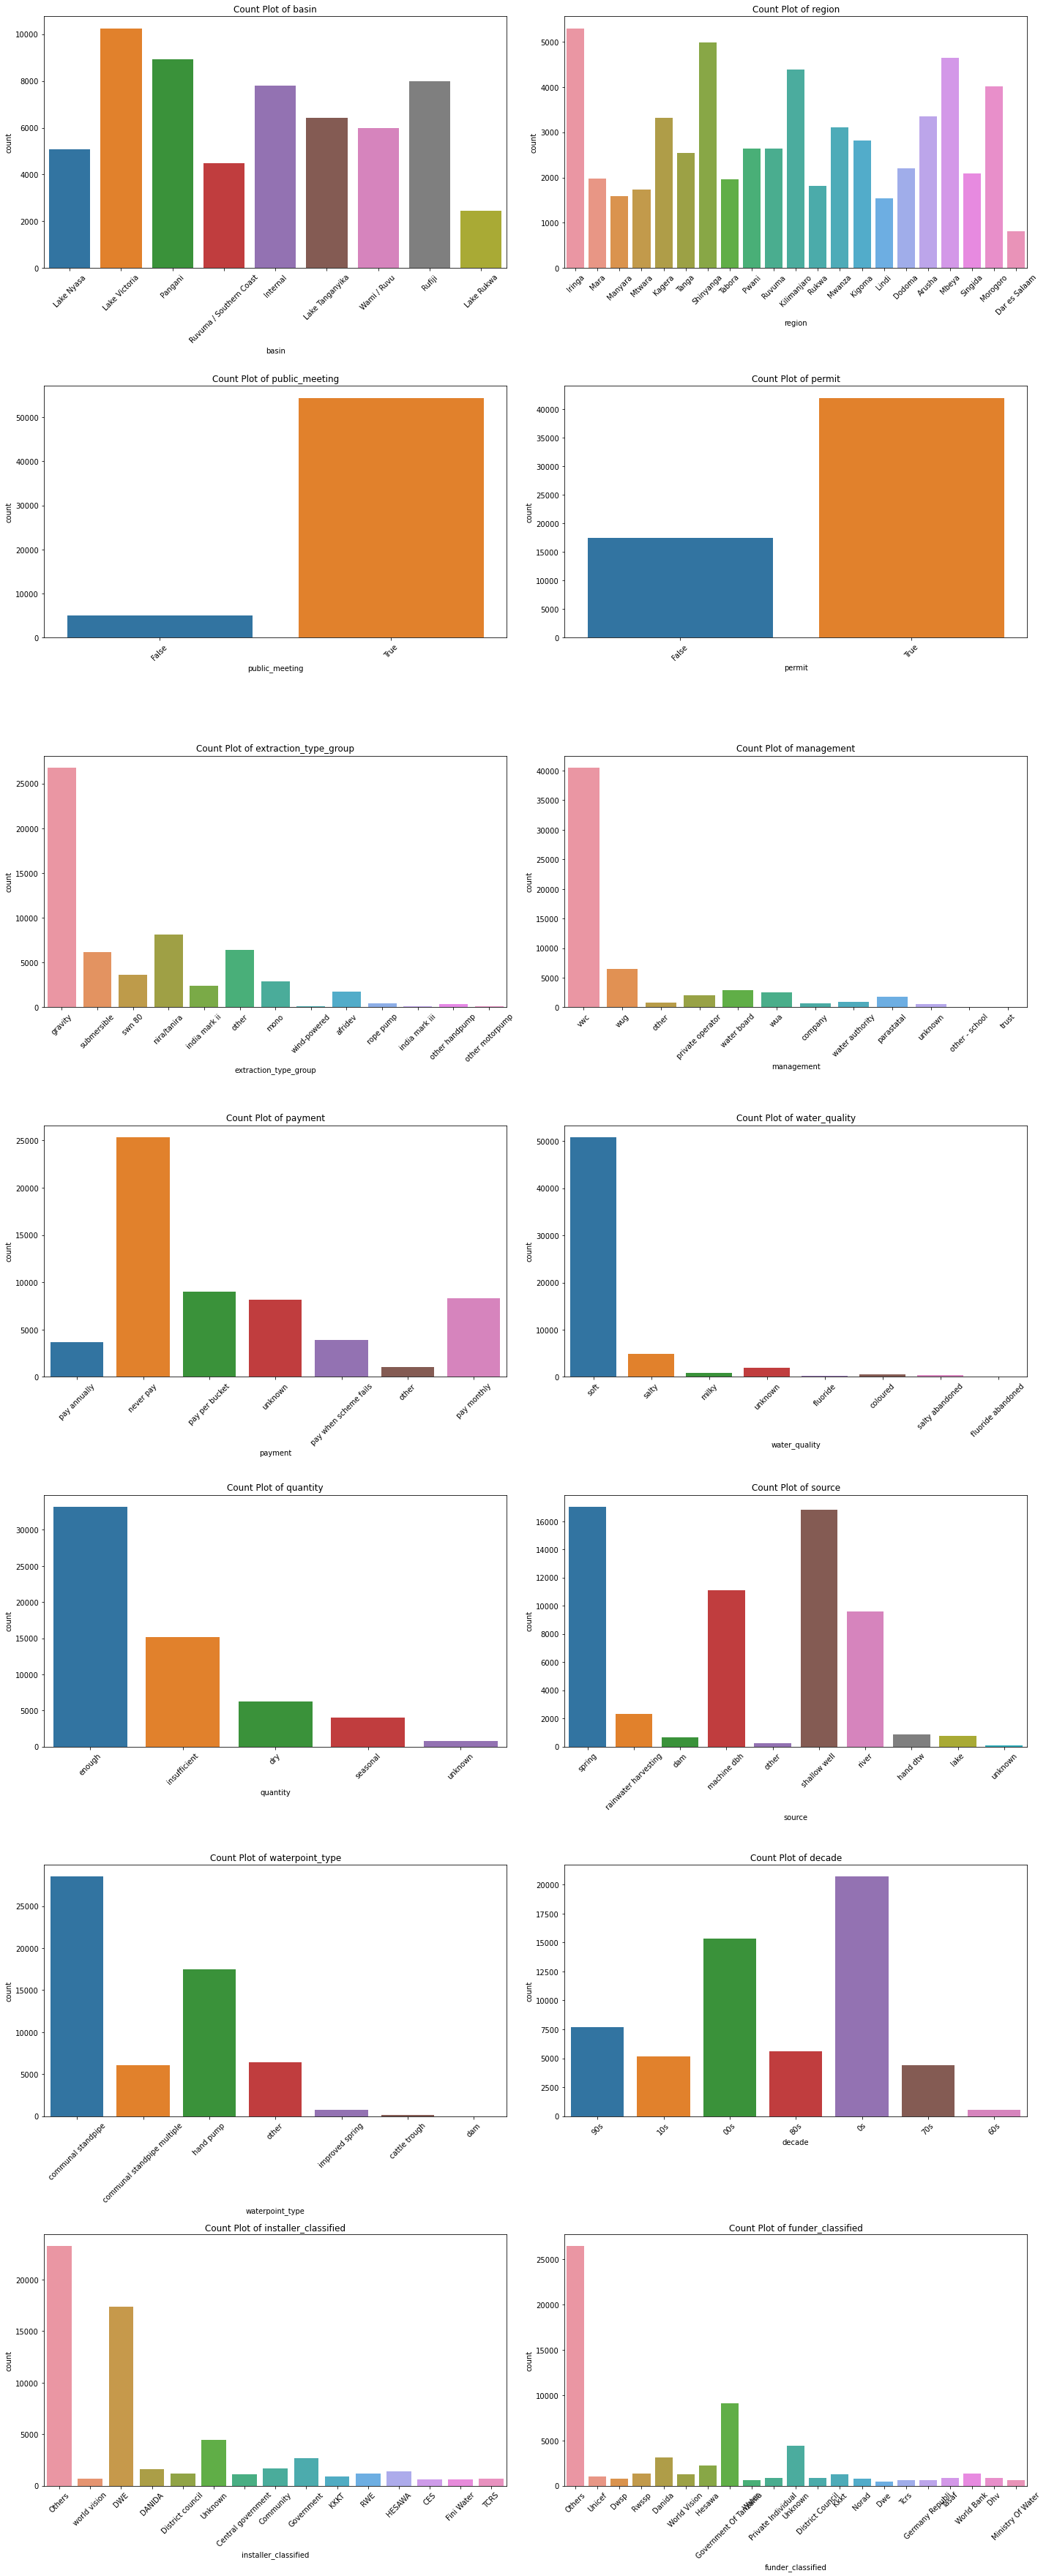

In [275]:

# Define the categorical columns for analysis
categorical_cols = ['basin', 'region', 'public_meeting', 'permit', 'extraction_type_group', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type', 'decade', 'installer_classified', 'funder_classified']

# Define the number of columns in each row of subplots
num_cols_per_row = 2

# Calculate the number of rows needed for subplots
num_rows = (len(categorical_cols) + num_cols_per_row - 1) // num_cols_per_row

# Create subplots with adjusted width and height
fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(20, num_rows * 7))

# Flatten the axis array for easier iteration
axs = axs.flatten()

# Loop through each categorical column and create count plots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=train_data1, ax=axs[i])
    axs[i].set_title(f'Count Plot of {col}')
    axs[i].tick_params(axis='x', rotation=45)

# Hide any extra subplots if the number of columns is not a multiple of num_cols_per_row
for j in range(len(categorical_cols), num_rows * num_cols_per_row):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

#### Numeric Variables

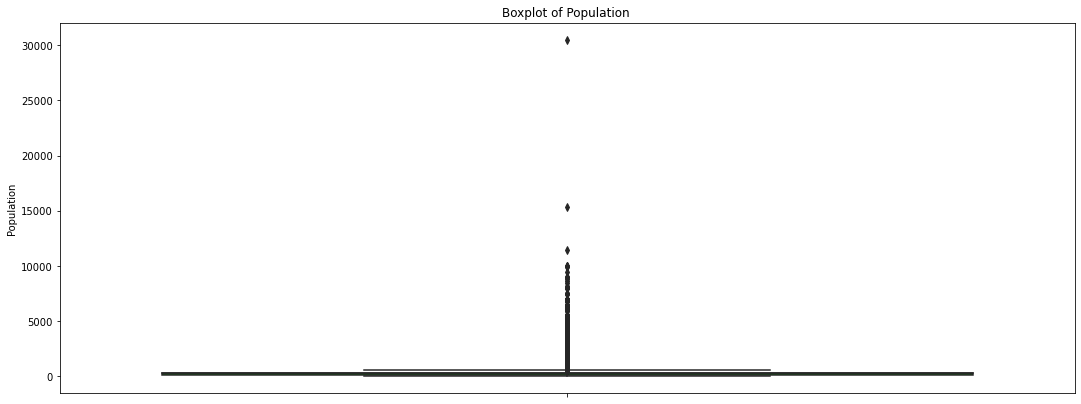

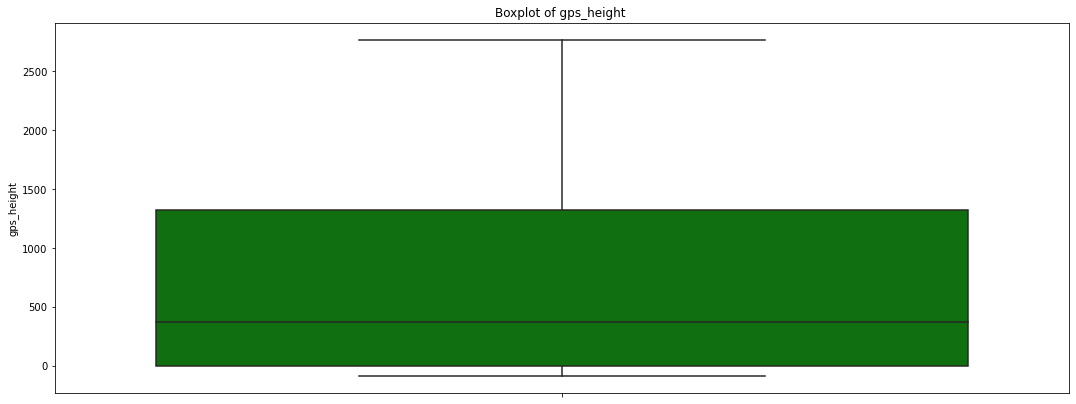

In [276]:



# Assuming train_data1 is your DataFrame
population_array = np.array(train_data1['population'])

# Set the size of the plot
plt.figure(figsize=(40, 15))

# Plot the boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=population_array, color='green')
plt.title('Boxplot of Population ')
plt.ylabel('Population')

# Show the plot
plt.show()


gps_height_array = np.array(train_data1['gps_height'])
# Plot the boxplot

# Set the size of the plot
plt.figure(figsize=(40, 15))
plt.subplot(2, 2, 2)
sns.boxplot(y=gps_height_array , color='green')
plt.title('Boxplot of gps_height ')
plt.ylabel('gps_height')

# Show the plot
plt.show()
                            


### Bivariate Analysis

#### Categorical variables

Unique status groups: ['functional' 'non functional' 'functional needs repair']


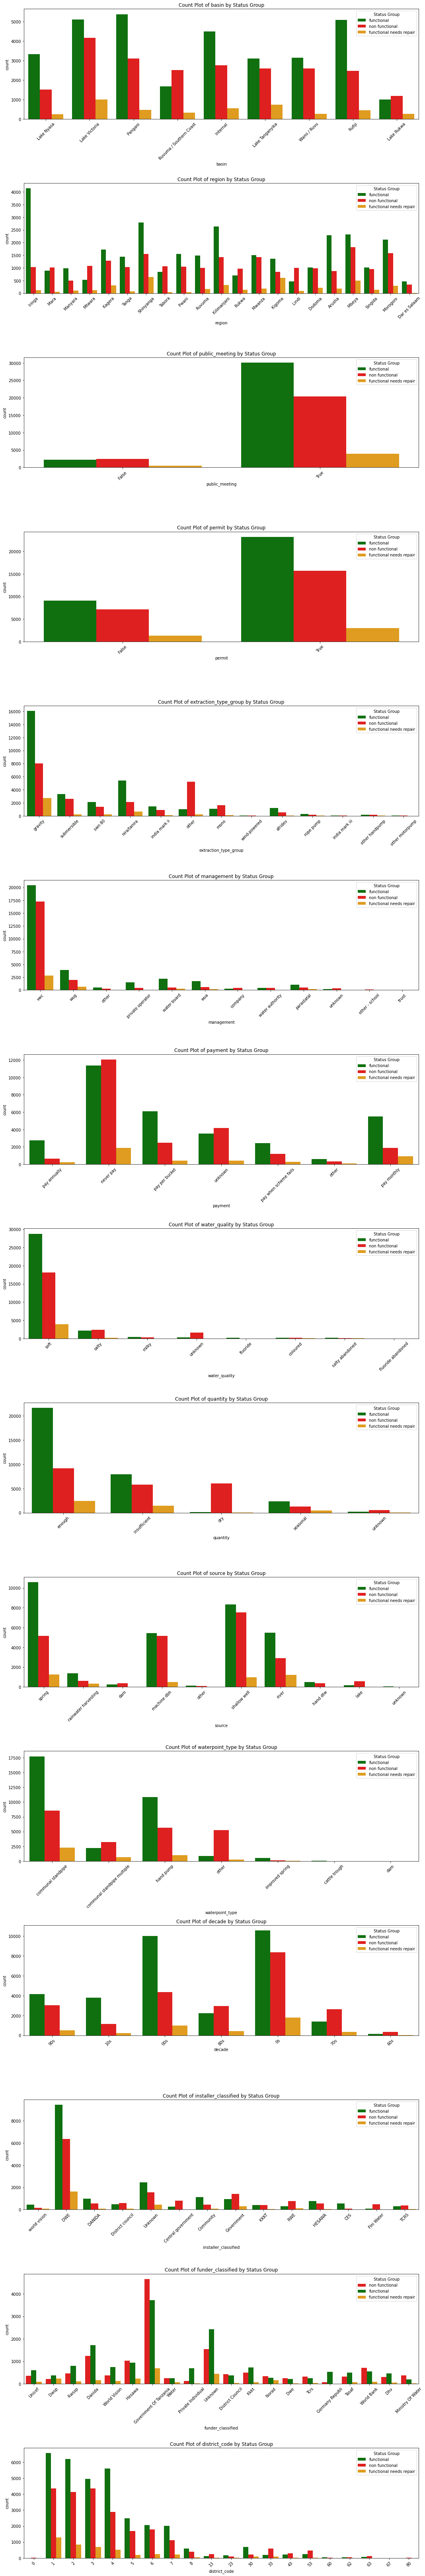

In [278]:
# Define the categorical and numeric columns for analysis
categorical_cols = ['basin', 'region', 'public_meeting', 'permit', 'extraction_type_group', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type', 'decade', 'installer_classified', 'funder_classified', 'district_code']
numeric_cols = ['gps_height', 'population']

# Define the number of columns in each row of subplots
num_cols_per_row = 1

# Calculate the number of rows needed for subplots
num_rows_cat = (len(categorical_cols) + num_cols_per_row - 1) // num_cols_per_row
num_rows_num = (len(numeric_cols) + num_cols_per_row - 1) // num_cols_per_row

# Inspect the unique values in the status_group column
unique_status_groups = train_data1['status_group'].unique()
print(f"Unique status groups: {unique_status_groups}")

# Create a color palette for the status groups
# Ensure these keys match the unique values exactly
palette = {
    'functional': 'green',
    'non functional': 'red',
    'functional needs repair': 'orange'
}

# Create subplots for categorical vs. target variable
fig, axs_cat = plt.subplots(num_rows_cat, num_cols_per_row, figsize=(15, num_rows_cat * 6))
axs_cat = axs_cat.flatten()

for i, col in enumerate(categorical_cols):
    if col in ['installer_classified', 'funder_classified']:
        # Filter out 'others' values
        filtered_data = train_data1[train_data1[col] != 'Others']
    else:
        filtered_data = train_data1

    sns.countplot(x=col, hue='status_group', data=filtered_data, ax=axs_cat[i], palette=palette)
    axs_cat[i].set_title(f'Count Plot of {col} by Status Group')
    axs_cat[i].tick_params(axis='x', rotation=45)
    axs_cat[i].legend(title='Status Group', loc='upper right')

# Hide any extra subplots if the number of columns is not a multiple of num_cols_per_row
for j in range(len(categorical_cols), num_rows_cat * num_cols_per_row):
    fig.delaxes(axs_cat[j])

plt.tight_layout()
plt.show()

#### Numerical variables

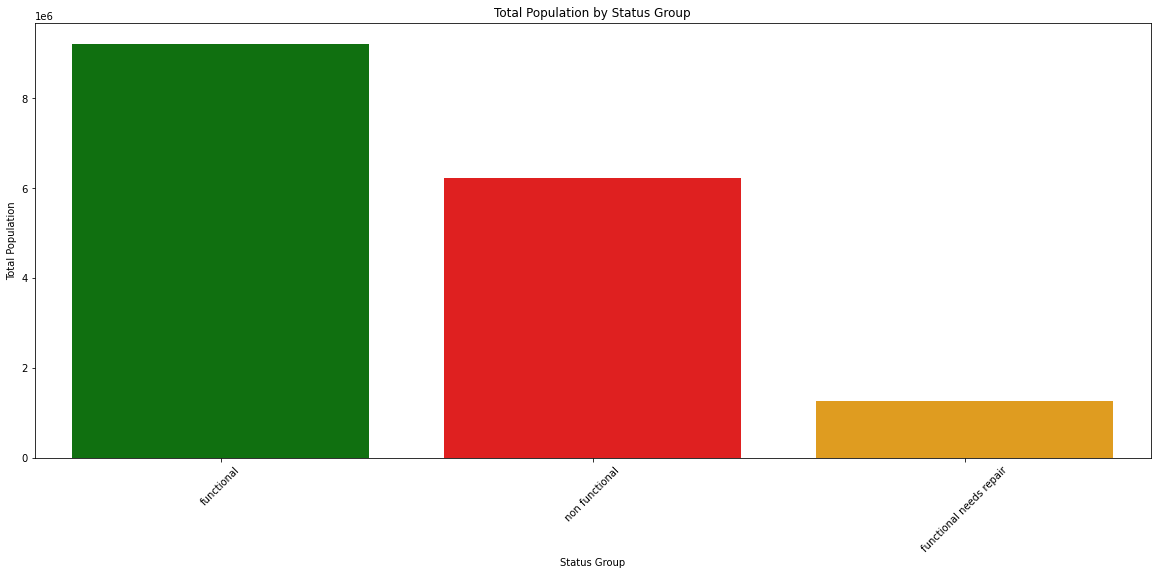

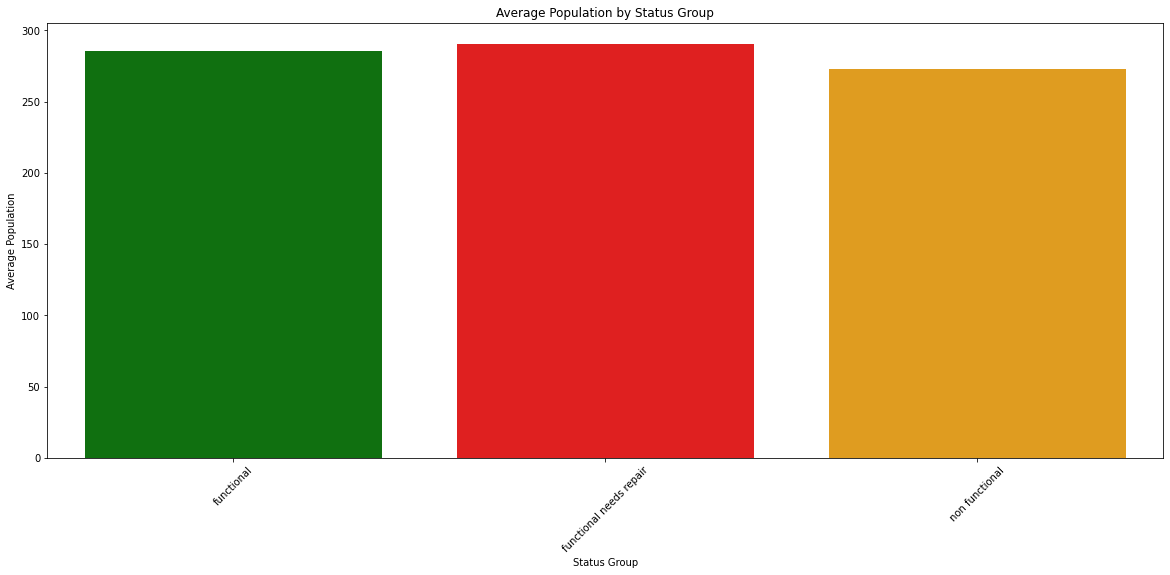

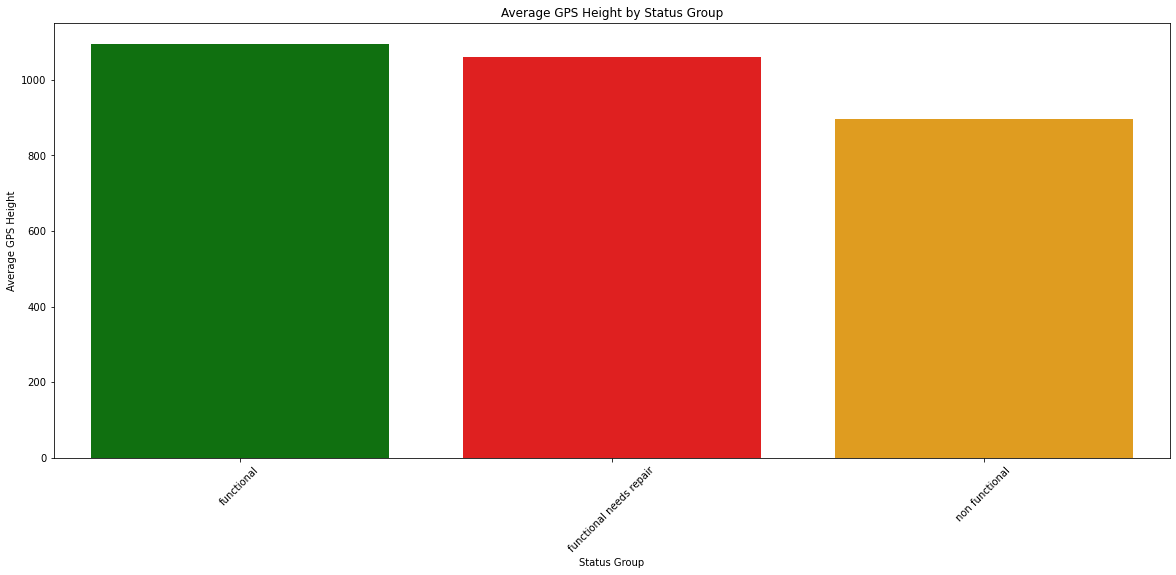

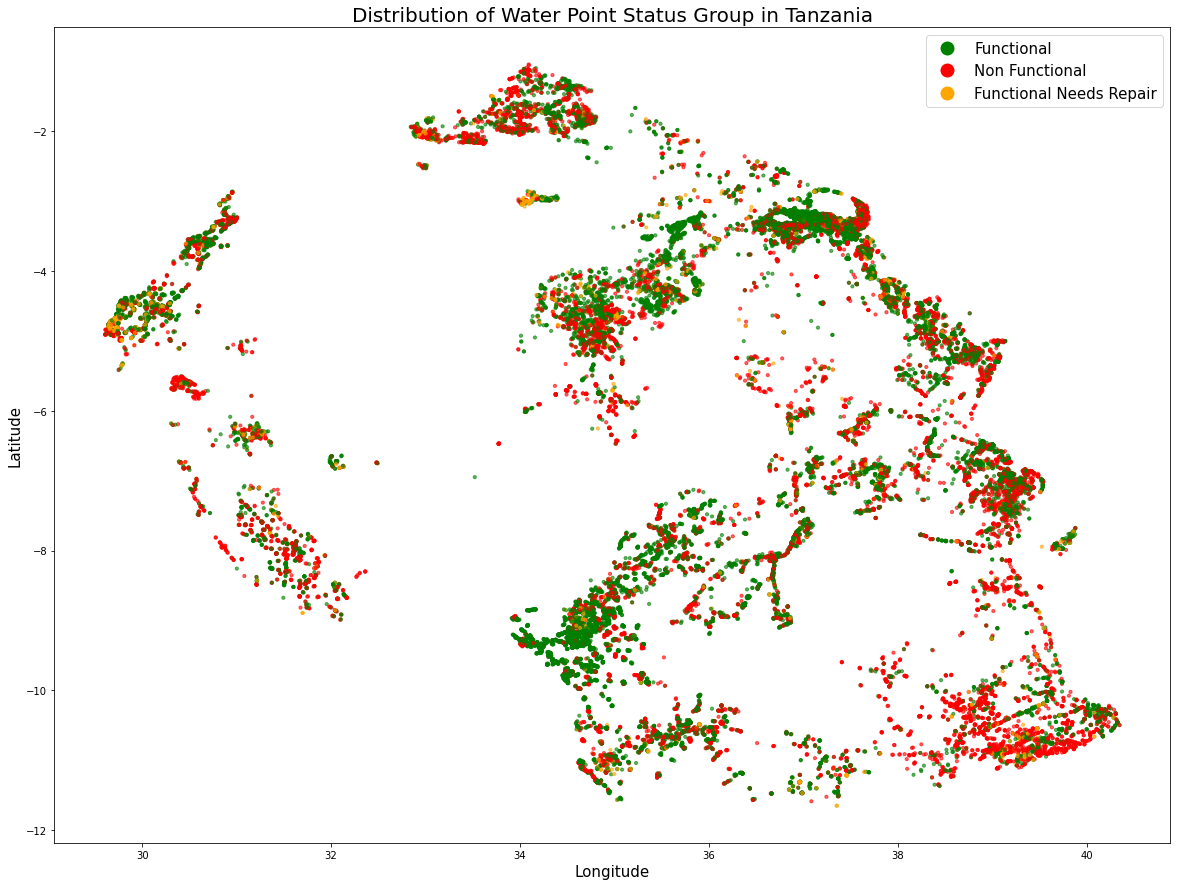

In [279]:
   # Define a color mapping for the status groups
status_colors = {
    'functional': 'green',
    'non functional': 'red',
    'functional needs repair': 'orange'
}

# Map status_group to colors
train_data1['color'] = train_data1['status_group'].map(status_colors)

# Aggregate population by status group (sum)
population_sum = train_data1.groupby('status_group')['population'].sum().reset_index()


# Ensure the order of bars matches the status_colors keys order
status_order = ['functional', 'non functional', 'functional needs repair']
colors = [status_colors[status] for status in status_order]

# Create a bar plot
plt.figure(figsize=(20, 8))  # Adjust figure size for better spacing
sns.barplot(x='status_group', y='population', data=population_sum, palette=colors, order=status_order)
plt.title('Total Population by Status Group')
plt.xlabel('Status Group')
plt.ylabel('Total Population')
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Filter out rows where population is zero or missing, if needed
train_data1 = train_data1[train_data1['population'] > 0]

# Aggregate population by status group (mean)
population_mean = train_data1.groupby('status_group')['population'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(20, 8))  # Adjust figure size for better spacing
sns.barplot(x='status_group', y='population', data=population_mean,palette=colors)
plt.title('Average Population by Status Group')
plt.xlabel('Status Group')
plt.ylabel('Average Population')
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Ensure 'gps_height' and 'status_group' are in the dataframe
if 'gps_height' in train_data1.columns and 'status_group' in train_data1.columns:
    # Filter out rows where gps_height is missing or zero, if needed
    train_data1 = train_data1[train_data1['gps_height'] != 0]
    
    # Aggregate gps_height by status group (mean)
    gps_height_mean = train_data1.groupby('status_group')['gps_height'].mean().reset_index()
    
    # Create a bar plot
    plt.figure(figsize=(20, 8))  # Adjust figure size for better spacing
    sns.barplot(x='status_group', y='gps_height', data=gps_height_mean, palette=colors)
    plt.title('Average GPS Height by Status Group')
    plt.xlabel('Status Group')
    plt.ylabel('Average GPS Height')
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()
else:
    print("Columns 'gps_height' or 'status_group' not found in the dataset.")

   # Define a color mapping for the status groups
status_colors = {
    'functional': 'green',
    'non functional': 'red',
    'functional needs repair': 'orange'
}

# Map status_group to colors
train_data1['color'] = train_data1['status_group'].map(status_colors)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(20, 15))  # Increase the figure size

# Plot the scatter plot
scatter = ax.scatter(train_data1['longitude'], train_data1['latitude'], c=train_data1['color'], alpha=0.6, s=10)

# Add basemap from OpenStreetMap
# Note: This step assumes you have contextily installed and can fetch the basemap.
# Uncomment the below lines if contextily is available and installed
#import contextily as ctx
#ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# Set title and labels
plt.title('Distribution of Water Point Status Group in Tanzania', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)

# Create a custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Functional', markerfacecolor='green', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Non Functional', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Functional Needs Repair', markerfacecolor='orange', markersize=15)
]

ax.legend(handles=legend_elements, loc='upper right', fontsize=15)

plt.show()

### Multivariate Analysis

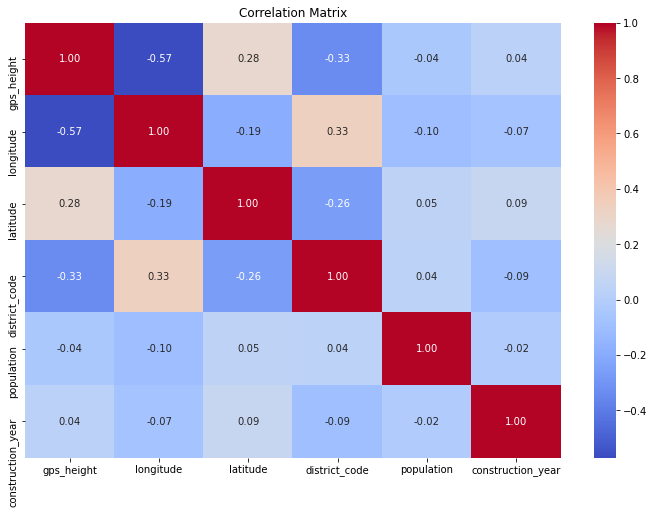

In [280]:
# Select only numeric columns for correlation computation
numeric_cols = train_data1.select_dtypes(include=['float64', 'int64']).columns
numeric_data = train_data1[numeric_cols]

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Observations

1. Government-funded wells often exhibit a higher likelihood of being non-functional, highlighting a need for improved oversight or maintenance practices in these projects.


2. Areas with higher populations tend to have a greater number of functional wells, indicating a correlation between population density and well functionality.

3. Certain areas show a higher probability of accessing clean water, particularly those situated near good water basins, highlighting the importance of geographical location in water quality.

4. Despite being one of the most densely populated cities, Dar es Salaam has a significant portion (35%) of clean water sources classified as non-functional, indicating challenges in maintaining water infrastructure.

5. Iringa, an important area, has a notable number of non-functional water points with soft water, suggesting potential issues with water quality or infrastructure maintenance in this region.

6. Water points installed by central government and district councils also show a tendency towards non-functionality, indicating potential systemic issues in water infrastructure management at the governmental level.

7. While gravity-based extraction is the most common type, hand pumps, which are less efficient, rank second. This suggests a need for authorities to focus on upgrading or maintaining pumping infrastructure, particularly for gravity-based systems that are naturally reliant on gravitational forces.

8. Some water points with sufficient and soft water are non-functional, indicating that water quality alone may not guarantee well functionality and that other factors like maintenance play a crucial role.

9. Recent years have seen a higher proportion of functional wells compared to older ones, but there are still functional wells that require repair. This underscores the importance of timely maintenance to prevent functional wells from deteriorating into non-functional ones.

10. Many water wells with ample water resources are non-functional, highlighting potential issues with infrastructure or operational aspects rather than water availability.

#### Recommendations

1. Targeted Maintenance: Prioritize maintenance in densely populated areas and near good water basins, focusing on government-funded wells and central installations.

2. Water Quality Focus: Improve water quality monitoring and treatment, especially in areas with soft water but high non-functionality rates like Iringa.

3. Pumping Infrastructure Investment: Upgrade pumping infrastructure, particularly hand pumps and gravity systems, to enhance efficiency and reduce non-functional wells.

## **Modelling**

In [281]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38962 entries, 0 to 59399
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funder                 38962 non-null  object 
 1   gps_height             38962 non-null  int64  
 2   installer              38962 non-null  object 
 3   longitude              38962 non-null  float64
 4   latitude               38962 non-null  float64
 5   basin                  38962 non-null  object 
 6   region                 38962 non-null  object 
 7   district_code          38962 non-null  int64  
 8   lga                    38962 non-null  object 
 9   ward                   38962 non-null  object 
 10  population             38962 non-null  int64  
 11  public_meeting         38962 non-null  bool   
 12  permit                 38962 non-null  bool   
 13  construction_year      38962 non-null  int64  
 14  extraction_type_group  38962 non-null  object 
 15  managem

### Drop columns that are not necessary for our modeling

In [282]:
train_data1.drop(columns=['funder','installer','construction_year','color','lga','ward'],inplace=True )

In [283]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38962 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             38962 non-null  int64  
 1   longitude              38962 non-null  float64
 2   latitude               38962 non-null  float64
 3   basin                  38962 non-null  object 
 4   region                 38962 non-null  object 
 5   district_code          38962 non-null  int64  
 6   population             38962 non-null  int64  
 7   public_meeting         38962 non-null  bool   
 8   permit                 38962 non-null  bool   
 9   extraction_type_group  38962 non-null  object 
 10  management             38962 non-null  object 
 11  payment                38962 non-null  object 
 12  water_quality          38962 non-null  object 
 13  quantity               38962 non-null  object 
 14  source                 38962 non-null  object 
 15  waterpo

In [284]:
# Convert public_meeting, permit to 0 and 1
# Convert 'permit' and 'public_meeting' to binary (0 and 1)
train_data1['permit'] = train_data1['permit'].map({True: 1, False: 0})
train_data1['public_meeting'] = train_data1['public_meeting'].map({True: 1, False: 0})
train_data1.head()

,gps_height,longitude,latitude,basin,region,district_code,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group,decade,installer_classified,funder_classified
0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,109,1,0,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,90s,Others,Others
1,1399,34.698766,-2.147466,Lake Victoria,Mara,2,280,1,1,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,10s,Others,Others
2,686,37.460664,-3.821329,Pangani,Manyara,4,250,1,1,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,00s,world vision,Others
3,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,58,1,1,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,80s,Others,Unicef
10,62,39.209518,-7.034139,Wami / Ruvu,Pwani,43,345,1,0,submersible,private operator,never pay,salty,enough,machine dbh,other,functional,10s,Others,Others


In [285]:
train_data1['status_group'].value_counts()

status_group
functional                 21790
non functional             14618
functional needs repair     2554
Name: count, dtype: int64

### Convert target to ternary values

In [286]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
train_data1['status_group'] = train_data1['status_group'].replace(target_status_group)

In [287]:
train_data1['status_group'].value_counts()

status_group
0    21790
2    14618
1     2554
Name: count, dtype: int64

### Having my numerical,target and my categorical columns

In [288]:
categorical_columns = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_classified','funder_classified']

In [289]:
numerical_columns = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [290]:
target='status_group'

### Logistics Regression Model

##### Assumptions

1. Linearity: Assumes a linear relationship between the independent variables and the log-odds of the dependent variable.
2. Independence of Errors: Assumes that the errors (residuals) of the observations are independent.
3. No Multicollinearity: Assumes that the independent variables are not highly correlated with each other. Multicollinearity can inflate the variance of coefficient estimates and make the model unstable.
4. Homoscedasticity: Assumes constant variance of errors.
5. Binary Outcome: Assumes the outcome variable is binary (can be extended to multinomial logistic regression for multiple classes).

In [291]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,balanced_accuracy_score
from sklearn.impute import SimpleImputer
from scipy.stats import uniform
from sklearn.svm import SVC


In [292]:
# Separate features and target
X = train_data1[categorical_columns + numerical_columns]
y = train_data1[target]

Train Accuracy: 0.7608842118771857
Test Accuracy: 0.7633773899653535
Balance Train Accuracy: 0.5641972764919815
Balance Test Accuracy: 0.5654770868968072


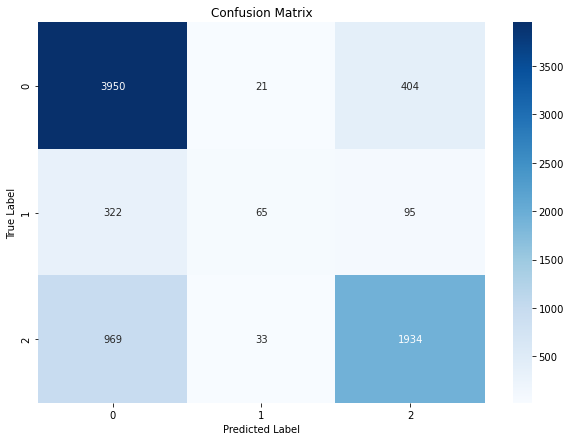

In [293]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Define pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

y_pred_train = pipeline.predict(X_train)

# Evaluate the model
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Balance Train Accuracy:', balanced_accuracy_score(y_train, y_pred_train))
print('Balance Test Accuracy:', balanced_accuracy_score(y_test, y_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Tuned Logistic Regression Model

Train Accuracy: 0.7338701915364625
Test Accuracy: 0.727960990632619
Balance Train Accuracy: 0.6191026542009768
Balance Test Accuracy: 0.6056496769924631


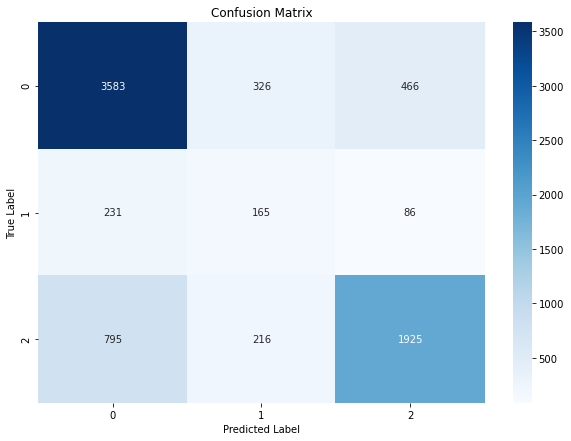

In [294]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Define pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced',solver='liblinear',max_iter=1000))
])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manually tune parameters
best_score = 0
best_params = {}
for C in [0.001, 0.01, 0.1, 1, 10]:
    for penalty in ['l1', 'l2']:
        try:
            # Set parameters
            pipeline.set_params(classifier__C=C, classifier__penalty=penalty)
            # Train model
            pipeline.fit(X_train, y_train)
            # Evaluate model
            score = accuracy_score(y_test, pipeline.predict(X_test))
           
            # Update best parameters
            if score > best_score:
                best_score = score
                best_params = {'C': C, 'penalty': penalty}
        except ValueError as e:
            pass
          

# Train the best model
pipeline.set_params(classifier__C=best_params['C'], classifier__penalty=best_params['penalty'])
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the model
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Balance Train Accuracy:', balanced_accuracy_score(y_train, y_pred_train))
print('Balance Test Accuracy:', balanced_accuracy_score(y_test, y_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Decision tree Model

##### Assuptions

1. Independence of Observations: Assumes that the observations in the dataset are independent of each other.
2. No Assumption on Feature Distribution: Decision Trees do not make assumptions about the distribution of the data.
3. Sufficient Data: Requires a large enough dataset to adequately split and create meaningful branches.
4. Minimal Preprocessing: Can handle both numerical and categorical data, and does not require data scaling or normalization.
5. Non-Linearity: Can capture non-linear relationships between features and the target variable.

In [295]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,balanced_accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Train Accuracy: 1.0
Test Accuracy: 0.7691518029000385
Balance Train Accuracy: 1.0
Balance Test Accuracy: 0.6371708390335455


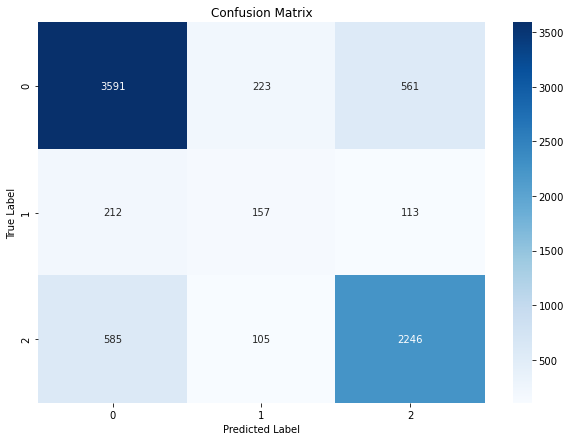

In [296]:
# Preprocess the categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create the decision tree pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the model
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Balance Train Accuracy:', balanced_accuracy_score(y_train, y_pred_train))
print('Balance Test Accuracy:', balanced_accuracy_score(y_test, y_pred))


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Tuned Decision Tree Model

Train Accuracy: 0.9904392184542333
Test Accuracy: 0.7647889131271655
Balance Train Accuracy: 0.9933755576465688
Balance Test Accuracy: 0.6419274896400157


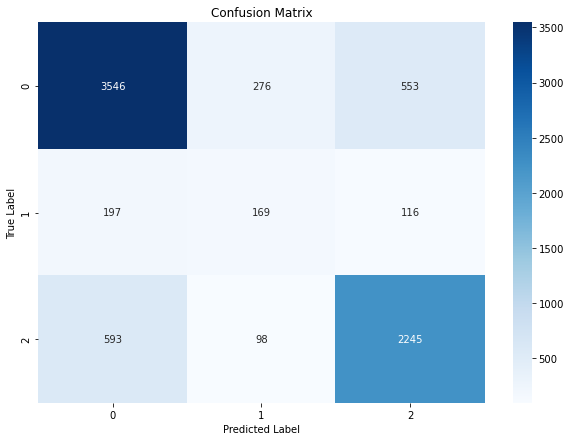

In [297]:
# Preprocess the categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create the decision tree pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced',random_state=42))
])

# Define a range of hyperparameters to search over
criteria = ['gini', 'entropy']
max_depths = [None, 10, 20, 30]
min_samples_splits = [2, 5, 10]
min_samples_leaves = [1, 2, 4]

best_score = 0
best_params = {}

# Manually tune hyperparameters
for criterion in criteria:
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits:
            for min_samples_leaf in min_samples_leaves:
                # Set parameters
                pipeline.set_params(
                    classifier__criterion=criterion,
                    classifier__max_depth=max_depth,
                    classifier__min_samples_split=min_samples_split,
                    classifier__min_samples_leaf=min_samples_leaf
                )
                # Train model
                pipeline.fit(X_train, y_train)
                # Evaluate model
                score = accuracy_score(y_test, pipeline.predict(X_test))
                # Update best parameters
                if score > best_score:
                    best_score = score
                    best_params = {
                        'criterion': criterion,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }

# Train the best model
pipeline.set_params(
    classifier__criterion=best_params['criterion'],
    classifier__max_depth=best_params['max_depth'],
    classifier__min_samples_split=best_params['min_samples_split'],
    classifier__min_samples_leaf=best_params['min_samples_leaf']
)
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the model
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Balance Train Accuracy:', balanced_accuracy_score(y_train, y_pred_train))
print('Balance Test Accuracy:', balanced_accuracy_score(y_test, y_pred))


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Support Vector Machine Model

##### Assunptions

1. Linearly Separable Data (for Linear SVM): Assumes that the data is linearly separable if using a linear kernel.
2. Margin Maximization: SVM tries to find the hyperplane that maximizes the margin between the classes.
3. Kernel Trick (for Non-Linear SVM): Assumes that the kernel function can transform the data into a higher-dimensional space where it is linearly separable.
4. Feature Scaling: Assumes that the data is scaled properly. SVMs are sensitive to the scale of the input features.
5. Independence of Observations: Assumes that the observations are independent of each other.

Train Accuracy: 0.7499117713112388
Test Accuracy: 0.7505453612216091
Balance Train Accuracy: 0.5193383759702246
Balance Test Accuracy: 0.5182602187912374


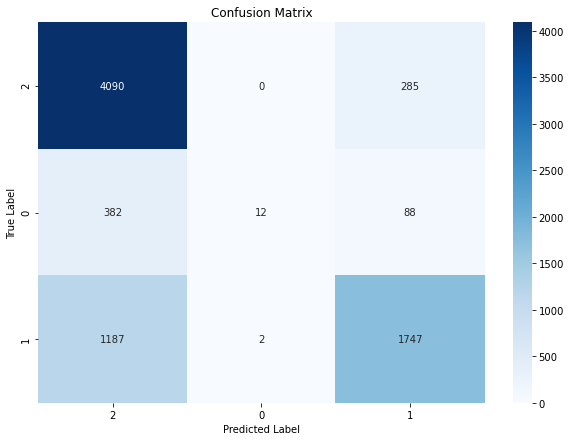

In [298]:
# Preprocess the categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create the SVM pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)


# Evaluate the model
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Balance Train Accuracy:', balanced_accuracy_score(y_train, y_pred_train))
print('Balance Test Accuracy:', balanced_accuracy_score(y_test, y_pred))


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get the unique classes from the target
classes = y_train.unique()

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest Machine Learning Model

##### Assumptions

1. Independence of Observations: Assumes that the observations in the dataset are independent of each other.
2. No Assumption on Distribution: Unlike some models, Random Forest does not make strong assumptions about the distribution of the data.
3. Feature Importance: Assumes that some features are more important than others, and the model will try to identify and leverage these important features.
4. Sufficient Data: Requires a sufficiently large dataset to build diverse and effective trees.
5. Minimal Preprocessing: Can handle missing values and does not require much preprocessing (like scaling) of the data.

Train Accuracy: 0.9999679168404505
Test Accuracy: 0.8179135121262672
Balance Train Accuracy: 0.9998391248391248
Balance Test Accuracy: 0.6558696180171392


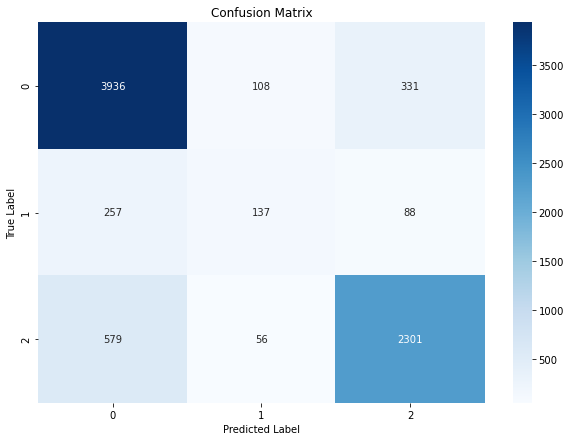

In [299]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

# Assuming X and y are your features and target variables
X = pd.DataFrame(X, columns=numerical_columns + categorical_columns)
y = pd.Series(y, name=target)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# choosing scaler and encoder
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=categorical_columns)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# Preprocess the categorical and numerical columns
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, numerical_columns),
                    ('cat', cat_transformer, categorical_columns)])

# Create the Random Forest pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the model
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Balance Train Accuracy:', balanced_accuracy_score(y_train, y_pred_train))
print('Balance Test Accuracy:', balanced_accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##### Tuning Random forest Model- My Final Model

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}
Train Accuracy: 0.9025
Test Accuracy: 0.7870
Balanced Train Accuracy: 0.9310
Balanced Test Accuracy: 0.7161


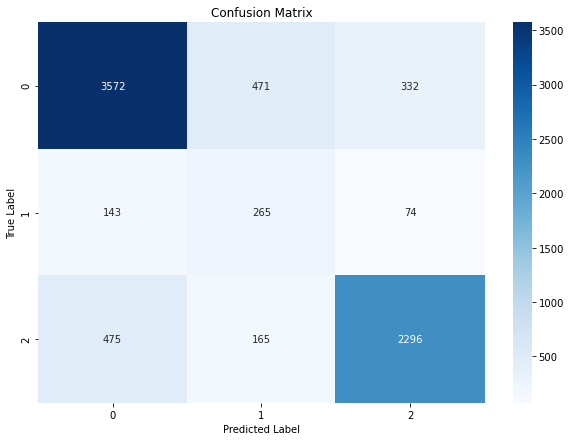

In [300]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import category_encoders as ce


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Choosing scaler and encoder
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=categorical_columns)

# Putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# Getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
    transformers=[('num', num_transformer, numerical_columns),
                  ('cat', cat_transformer, categorical_columns)]
)

# Set RandomForestClassifier with initial parameters
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion='entropy', max_features='sqrt',
                            min_samples_split=10, class_weight='balanced')

# Giving all values to pipeline
pipeline = make_pipeline(preprocessor, rf)

# Define hyperparameter ranges
n_estimators_options = [100, 200]
max_depth_options = [None, 10, 20]
min_samples_split_options = [2, 5]
min_samples_leaf_options = [2, 4]
max_features_options = ['sqrt']
bootstrap_options = [True, False]

best_score = 0
best_params = {}

# Loop through all combinations of hyperparameters
for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        for min_samples_split in min_samples_split_options:
            for min_samples_leaf in min_samples_leaf_options:
                for max_features in max_features_options:
                    for bootstrap in bootstrap_options:
                        # Update the model in the pipeline
                        pipeline.set_params(randomforestclassifier__n_estimators=n_estimators,
                                            randomforestclassifier__max_depth=max_depth,
                                            randomforestclassifier__min_samples_split=min_samples_split,
                                            randomforestclassifier__min_samples_leaf=min_samples_leaf,
                                            randomforestclassifier__max_features=max_features,
                                            randomforestclassifier__bootstrap=bootstrap)
                        
                        # Train the model
                        pipeline.fit(X_train, y_train)
                        
                        # Predict on the test set
                        y_test_pred = pipeline.predict(X_test)
                        
                        # Evaluate the model
                        score = balanced_accuracy_score(y_test, y_test_pred)
                        
                        # If the current score is better than the best score, update best score and best params
                        if score > best_score:
                            best_score = score
                            best_params = {
                                'n_estimators': n_estimators,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf,
                                'max_features': max_features,
                                'bootstrap': bootstrap
                            }

# Print the best hyperparameters 
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters on the entire training set
pipeline.set_params(randomforestclassifier__n_estimators=best_params['n_estimators'],
                    randomforestclassifier__max_depth=best_params['max_depth'],
                    randomforestclassifier__min_samples_split=best_params['min_samples_split'],
                    randomforestclassifier__min_samples_leaf=best_params['min_samples_leaf'],
                    randomforestclassifier__max_features=best_params['max_features'],
                    randomforestclassifier__bootstrap=best_params['bootstrap'])

pipeline.fit(X_train, y_train)

# Predictions on train set
y_pred = pipeline.predict(X_train)

# Predictions on test set
y_pred_test = pipeline.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred)
test_accuracy = accuracy_score(y_test, y_pred_test)
balance_train_accuracy = balanced_accuracy_score(y_train, y_pred)
balance_test_accuracy = balanced_accuracy_score(y_test, y_pred_test)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Balanced Train Accuracy: {balance_train_accuracy:.4f}")
print(f"Balanced Test Accuracy: {balance_test_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['randomforestclassifier'].classes_, yticklabels=pipeline.named_steps['randomforestclassifier'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Conclusion on my final model- Random Forest

The final model is a RandomForestClassifier with tuned hyperparameters trained on a dataset split into training and testing sets. The hyperparameters were tuned using an exhaustive search through various combinations to find the ones that maximize the balanced accuracy score on the test set. The best hyperparameters identified were as follows: 'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False.

The model achieved a decent level of performance, with a test accuracy of 78.70% and a balanced test accuracy of 71.61%. These metrics indicate that the model generalizes reasonably well to unseen data and is not overfitting excessively to the training set. The balanced accuracy score is particularly useful in scenarios where classes are imbalanced, as it takes into account the imbalance and provides a more reliable measure of overall model performance.

The confusion matrix plot visualizes how well the model is predicting each class. It shows the number of true positives, true negatives, false positives, and false negatives for each class, allowing for a deeper understanding of the model's strengths and weaknesses in classification. Overall, the final model appears to be a solid choice for the given dataset and task.

### Predictive Analysis of Tanzanian Water Well Conditions

**Model Performance**
The classifier built to predict the condition of water wells in Tanzania achieved a test accuracy of 78.70% and a balanced test accuracy of 71.61%. These metrics suggest that the model performs reasonably well in identifying the condition of water wells based on features

**Important Features**
The most important features identified by the model include the type of pump used, the installation year, and possibly other geographic or environmental factors. Understanding these key features can help stakeholders prioritize maintenance and repair efforts for water wells.

**Useful Predictions**
For an NGO focused on locating wells needing repair, the model's predictions can be highly valuable. By identifying non-functional or deteriorating wells accurately, the NGO can allocate resources more efficiently and effectively, ensuring that clean water access is maintained or restored where needed most.


#### Recommendations for Stakeholders:

1. Modify Input Variables: Based on the model's insights, stakeholders could consider modifying certain input variables. For example, investing in newer pump technologies or improving maintenance schedules for wells installed in specific years could lead to better overall well conditions.

2. Target Results: The model can help stakeholders set specific targets for well conditions. By analyzing patterns in non-functional wells, they can influence how new wells are built, ensuring they are more resilient and require less frequent repairs.

3. Geographical Considerations: Considering geographic or environmental factors that influence well conditions can further enhance the model's predictive capabilities. For instance, areas with certain soil types or rainfall patterns may require different pump types or maintenance strategies.


In conclusion, the predictive model offers valuable insights into the condition of Tanzanian water wells, aiding stakeholders in making informed decisions regarding maintenance, repair, and future well construction strategies.

### Next Steps

1. Validation and Deployment of Model: Validate the predictive model using additional datasets or real-time data to ensure its accuracy and reliability. Once validated, deploy the model for ongoing monitoring and prediction of water well conditions.

2. Actionable Insights Implementation: Implement actionable insights derived from the EDA analysis, such as prioritizing maintenance in high-population areas, improving water quality monitoring, and investing in pumping infrastructure. Collaborate with stakeholders and authorities to translate these insights into practical initiatives.

3. Continuous Improvement: Continuously evaluate and improve the model based on feedback and new data. Incorporate feedback from field teams, stakeholders, and ongoing data collection to refine the model's predictive capabilities and enhance decision-making related to water well management